In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
from src import utils, nlp_utils
from bs4 import BeautifulSoup

import nltk
from nltk.corpus import stopwords

from datetime import datetime

#nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

# LDA - Wall Street Market

## Data Processing

In [2]:
wallstreet = pd.read_csv('data/wallstreet.csv')
wall_nlp = wallstreet[['subforum', 'contentWithHTMLTag']].copy()
wall_nlp['cleaned_content'] = wall_nlp['contentWithHTMLTag'].apply(lambda x: nlp_utils.clean_parse_text(x))
wall_nlp['lemmatized_tokens'] = wall_nlp['cleaned_content'].apply(lambda x: nlp_utils.tokenize_lemmatize(x))
wall_nlp.to_csv('data/wall_nlp.csv', index=False)

--- 
# Bag of Words

In [3]:
wall_nlp.head()

,subforum,contentWithHTMLTag,cleaned_content,lemmatized_tokens
0,Introductions,"<div class=""entry-content"">\n<p>Just thought I...",just thought i'd introduce myself. i am new t...,"[thought, 'd, introduce, ., new, community, tr..."
1,Introductions,"<div class=""entry-content"">\n<p>Hello <img alt...",hello nice to see you here!regards,"[hello, nice, see, !, regard]"
2,Announcements,"<div class=""entry-content"">\n<p>Hello everyone...",hello everyone.i would like to tell you that ...,"[hello, everyone.i, would, like, tell, 've, im..."
3,Introductions,"<div class=""entry-content"">\n<p>Hello Punka! n...",hello punka! nice to meet you!as you asked ho...,"[hello, punka, !, nice, meet, !, asked, stay, ..."
4,Announcements,"<div class=""entry-content"">\n<h5>Changelog fro...","changelog from wednesday, november a lot of...","[changelog, wednesday, ,, november, lot, small..."


In [4]:
wall_nlp = pd.read_csv('data/wall_nlp.csv')

In [5]:
# Must be even for visualizations.
n_topics = 20
max_doc_freq = 0.3

cleaned_content = wall_nlp['lemmatized_tokens']
lda_output_bow, lda_model_bow, docs_vectorized_bow, vect_bow = nlp_utils.convert_to_bow_and_fit_lda_model(cleaned_content, 10000, max_doc_freq, n_topics, 'batch', 25, 3)

sorted_components = np.argsort(lda_model_bow,components_, axis=1)[:, ::-1]
feat_names = np.array(vect_bow.get_feature_names())

In [6]:
nlp_utils.print_topics(lda_model_bow, vect_bow, 10)


Topic #0:
account drop bank wrote need pm market fullz cc get

Topic #1:
name com offer http number card address url cvv account

Topic #2:
order offer utopia refund reship kush gramo weed http price

Topic #3:
may people service drug take year the one many book

Topic #4:
offer http profile wallstyizjhkrvmj listing new quality get passport license

Topic #5:
http id php viewtopic get rule help wsm signup ref

Topic #6:
order product quality vendor good price best review shipping note

Topic #7:
pgp begin signature message end hash signed profile vendor key

Topic #8:
http profile wallstyizjhkrvmj market store wsm bump infodesk infodesksorcvsgq leaguemodegrams

Topic #9:
card account bank transfer credit paypal money cash buy visa

Topic #10:
order vendor message support key dispute address wrote market send

Topic #11:
profile http wallstyizjhkrvmj offers shop picsou wsm link kallashnikov ref

Topic #12:
deal way world free become market vendor cocaine forum gold

Topic #13:
know wro

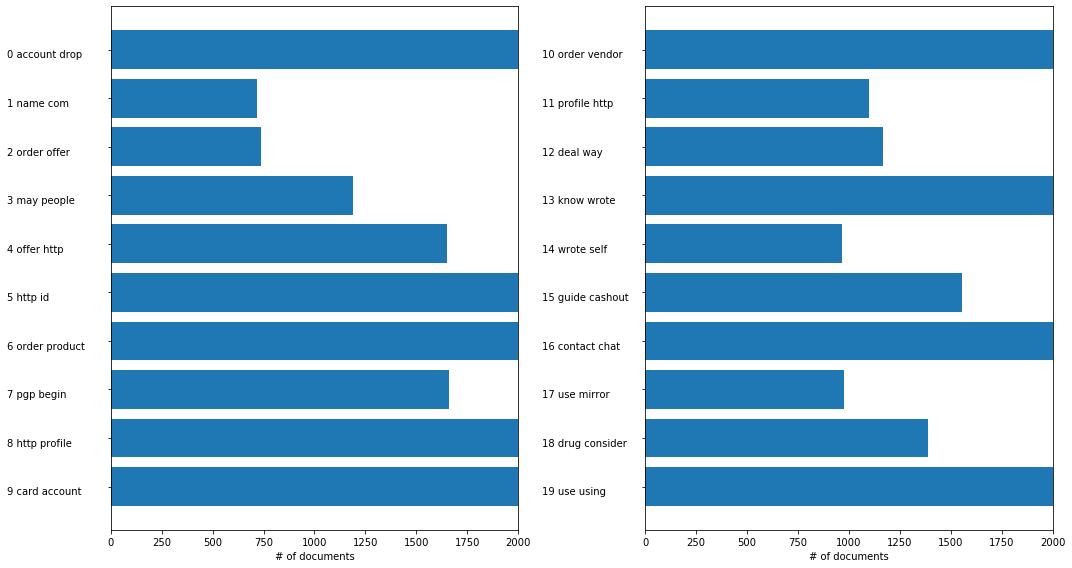

In [7]:
# Evaluate each topics (components) overall weight.
# Topics are named by the two most common words.

topics_per_plot = int(n_topics / 2)
barh_xlim = 2000
plot_pad = 100
fig_size = (15,8)
num_cols = 2

fig, ax = plt.subplots(1, 2, figsize=fig_size)

topic_names = ['{} {}'.format(i, ' '.join(words)) for i, words in enumerate(feat_names[sorted_components[:, :2]])]

for col in range(num_cols):
    start = col * topics_per_plot
    end = (col + 1) * topics_per_plot
    plot_width = np.sum(docs_bow, axis=0)[start:end]
    ax[col].barh(np.arange(topics_per_plot), plot_width)
    ax[col].set_yticks(np.arange(topics_per_plot))
    ax[col].set_yticklabels(topic_names[start:end], ha='left', va='top')
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, barh_xlim)
    ax[col].set_xlabel('# of documents')
    y_ax = ax[col].get_yaxis()
    y_ax.set_tick_params(pad=plot_pad)

plt.tight_layout();

In [8]:
# Topic order is based on topic popularity.
# The distance b/t circles reprsents an approximation topic similarity. It's approximation b/c only a 2D map.
# When lambda = 0, the bar chart solely show topic-specific terms (jargon).
doc_term_matrix = np.matrix(lda_model_bow.components_)
pyLDAvis.sklearn.prepare(lda_model_bow, doc_term_matrix, vect_bow)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13     0.169979 -0.061879       1        1  18.305011
6      0.118106 -0.015128       2        1   9.908668
19     0.176005  0.023124       3        1   9.146489
5     -0.274117 -0.097953       4        1   8.607592
10     0.128842 -0.081149       5        1   6.862410
15     0.061828  0.225303       6        1   5.733123
16     0.061693  0.051854       7        1   5.033074
0      0.076663  0.105198       8        1   4.950046
3      0.168680 -0.062882       9        1   4.880362
9      0.107092  0.209001      10        1   4.492668
7     -0.118596 -0.120174      11        1   3.276408
4     -0.184716  0.131369      12        1   2.939348
2     -0.042081  0.032028      13        1   2.897704
8     -0.359007 -0.051185      14        1   2.469363
11    -0.240760  0.116765      15        1   2.148552
18     0.122092 -0.119653      16        1   1.923955
17     0.031117 -0.045607      17        1   1.819510
12     0.028786 -0.153747      18        1   1.712905
1     -0.030280  0.127497      19        1   1.694652
14    -0.001326 -0.212784      20        1   1.198161, topic_info=            Term          Freq         Total Category  logprob  loglift
4209        http  40268.000000  40268.000000  Default  30.0000  30.0000
6502         php  15824.000000  15824.000000  Default  29.0000  29.0000
9487   viewtopic  15727.000000  15727.000000  Default  28.0000  28.0000
4272          id  17561.000000  17561.000000  Default  27.0000  27.0000
6063       offer  15826.000000  15826.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
4543  interested    140.533207   2125.319562  Topic20  -5.0219   1.7081
5087        link    153.594787   7242.811189  Topic20  -4.9331   0.5709
6589      please    146.812084   6896.181567  Topic20  -4.9782   0.5748
8846      thread    121.171762   1415.174867  Topic20  -5.1702   1.9666
4090          hi    105.143172   2537.195803  Topic20  -5.3120   1.2409

[1434 rows x 6 columns], token_table=      Topic      Freq                                               Term
term                                                                    
5        13  0.992691                                   ________________
9        19  0.975893  ______________________________________________...
21       20  0.979865                                               aber
34        1  0.035286                                         absolutely
34        2  0.056136                                         absolutely
...     ...       ...                                                ...
9974     19  0.664342                                                zip
9982     20  0.988194                                                 zu
9992     16  0.950010                                           автоматы
9995     16  0.950010                                            игровые
9999     16  0.935234                                             онлайн

[4507 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[14, 7, 20, 6, 11, 16, 17, 1, 4, 10, 8, 5, 3, 9, 12, 19, 18, 13, 2, 15])

### Model Performance

In [14]:
print(lda_bow)

LatentDirichletAllocation(max_iter=25, n_components=20, n_jobs=-1,
                          random_state=3)


In [18]:
# Log Likelihood: Higher the better
print('Log Likelihood: ', lda_bow.score(lda_bow.components_))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print('Perplexity: ', lda_bow.perplexity(lda_bow.components_))

# Model parameters
print(lda_bow.get_params())

Log Likelihood:  -10705065.361440951
Perplexity:  410.0692123734853
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 25, 'mean_change_tol': 0.001, 'n_components': 20, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 3, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


---
# TF-IDF

In [10]:
# Must be even for visualizations.
n_topics = 20
max_doc_freq = 0.3

tokens = wall_nlp['lemmatized_tokens']
lda_output_tfidf, lda_model_tfidf, docs_vectorized_tfidf, vect_tfidf = nlp_utils.calculate_tfidf_and_fit_lda_model(tokens, 10000, max_doc_freq, n_topics, 'batch', 25, 3)

sorted_components = np.argsort(lda_model_tfidf.components_, axis=1)[:, ::-1]
feat_names = np.array(vect_tfidf.get_feature_names())

In [11]:
nlp_utils.print_topics(lda_model_tfidf, vect_tfidf, 10)


Topic #0:
drop bank pm account need fullz market paypal wrote looking

Topic #1:
powerhouse note deal become existence unfree rebellion act absolutely world

Topic #2:
utopia vouch stepsauce offer go kush order weed reship gramo

Topic #3:
interested adderall thank stock profile pill suboxone legit look bar

Topic #4:
offer http profile met dxm brand lotto deusxmacinacharity method wall

Topic #5:
guide cashout bank record ssn pack extra link offer sale

Topic #6:
ai wallstyizjhkrvmj profile ok http storehttp pinkypink ref signup online

Topic #7:
pgp begin signature message end signed hash sample mirror onionshop

Topic #8:
http viewtopic php id rule dreadditevelidot phished signup ref help

Topic #9:
card account italian cc profile bank transfer sim selling service

Topic #10:
key pgp thanks message public click hello private decrypt lol

Topic #11:
picsou http shop offers profile wallstyizjhkrvmj paypal samaritan link ukfruits

Topic #12:
profile mdma ketamine cocaine ecstasy http 

In [12]:
doc_term_matrix = np.matrix(lda_tfidf.components_)
pyLDAvis.sklearn.prepare(lda_tfidf, doc_term_matrix, vect_tfidf)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19     0.152285  0.014366       1        1  30.834315
13     0.173385 -0.015493       2        1  10.441667
8     -0.040515 -0.276758       3        1   9.006152
17     0.168618 -0.010164       4        1   6.605892
0      0.173608 -0.078238       5        1   6.280331
7     -0.035115  0.121103       6        1   6.170440
9      0.110833 -0.041599       7        1   3.247116
16     0.116940 -0.097886       8        1   3.167162
5      0.022877 -0.047073       9        1   3.146965
15    -0.306930 -0.128381      10        1   2.860420
18     0.096925  0.053777      11        1   2.732460
1      0.027539  0.070016      12        1   2.441946
2     -0.046198  0.196525      13        1   2.034246
4     -0.061145  0.035910      14        1   1.860955
10     0.035635  0.032989      15        1   1.840656
3     -0.010661  0.076169      16        1   1.819015
11    -0.166009 -0.076648      17        1   1.567120
12    -0.197361  0.113442      18        1   1.505817
6     -0.175639 -0.016583      19        1   1.412402
14    -0.039071  0.074527      20        1   1.024923, topic_info=                  Term         Freq        Total Category  logprob  loglift
4209              http  2925.000000  2925.000000  Default  30.0000  30.0000
9487         viewtopic  1583.000000  1583.000000  Default  29.0000  29.0000
6502               php  1584.000000  1584.000000  Default  28.0000  28.0000
4272                id  1622.000000  1622.000000  Default  27.0000  27.0000
9581  wallstyizjhkrvmj  1086.000000  1086.000000  Default  26.0000  26.0000
...                ...          ...          ...      ...      ...      ...
9851             wrote    11.297250  1007.492734  Topic20  -5.2243   0.0899
8987                tr     9.218773    38.686418  Topic20  -5.4276   3.1463
2647             dream     9.571937   123.772314  Topic20  -5.3901   2.0209
2246        definitely     9.134050    80.497810  Topic20  -5.4369   2.4043
132              added     9.083404    89.356692  Topic20  -5.4424   2.2944

[1316 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
5        13  0.916538  ________________
17        1  0.406100                ab
17        2  0.252062                ab
17        4  0.042010                ab
17        5  0.070017                ab
...     ...       ...               ...
9950     14  0.975386       yourmomsbox
9951     14  0.938554  yourmomsboxworld
9969      5  0.963085             zelle
9978      2  0.840188             zloty
9982     20  0.840717                zu

[4648 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[20, 14, 9, 18, 1, 8, 10, 17, 6, 16, 19, 2, 3, 5, 11, 4, 12, 13, 7, 15])

In [19]:
# Log Likelihood: Higher the better
print('Log Likelihood: ', round(lda_model_tfidf.score(docs_vectorized_tfidf), 2))

# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print('Perplexity: ', round(lda_model_tfidf.perplexity(docs_vectorized_tfidf), 2))

# Model parameters
print(lda_model_tfidf.get_params())

Log Likelihood:  -1478543.1346205997
Perplexity:  1369.1521799937805
{'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'batch', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 25, 'mean_change_tol': 0.001, 'n_components': 20, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 3, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}
